#### Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#### Data

In [2]:
all_state = pd.read_csv(
    "/Users/dylanhayashi/Desktop/MSDS 422 - Practical Machine Learning/Data/allstate-claims-severity/train.csv"
)

In [3]:
# Create loss series
loss = all_state.loc[:, "loss"]

#### 1. Provide appropriate descriptive statistics and visualizations to help understand the marginal distribution of the dependent variable.

In [4]:
# Descriptive Statistics
display(round(loss.describe(), 3))

# Skew
print(f"\nThe distribution of loss is skewed right : {round(loss.skew(),3)}")

# Kurtosis
print(f"\nThe kurtosis of loss is quite high : {round(loss.kurtosis(),3)}")

count    188318.000
mean       3037.338
std        2904.086
min           0.670
25%        1204.460
50%        2115.570
75%        3864.045
max      121012.250
Name: loss, dtype: float64


The distribution of loss is skewed right : 3.795

The kurtosis of loss is quite high : 48.08


/Users/dylanhayashi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


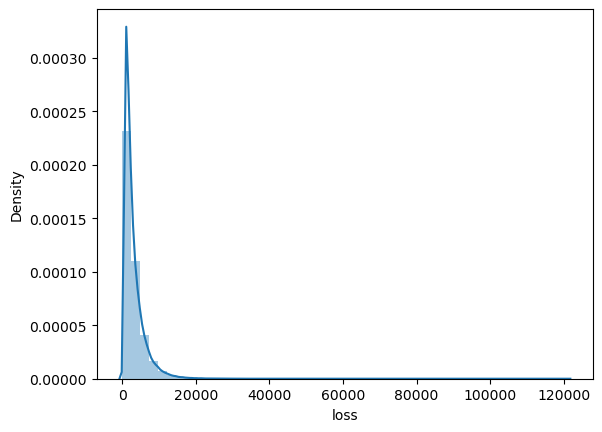

In [5]:
# Distplot
displot = sns.distplot(loss)
plt.show(displot)

#### 2. Investigate missing data and outliers.

In [6]:
# Missing Values
number_of_missing_values = all_state.isnull().sum().sum()
print("There are no missing values in this dataset. Wonderful!")
print(f"number_of_missing_values = {number_of_missing_values}\n")

There are no missing values in this dataset. Wonderful!
number_of_missing_values = 0



In [7]:
# Presence of Outliers Using Standard Deviation Definition of Outliers

# Upper and lower limits of distribution
lower_limit = loss.mean() - (3 * loss.std())
upper_limit = loss.mean() + (3 * loss.std())

# Create positive and negative outliers series
negative_outliers = loss[loss < lower_limit]
positive_outliers = loss[loss > upper_limit]

# Description of data
print(
    f"""Using the standard deviation definition of outliers, for 'Loss' there are:
\n{len(negative_outliers)} negative outliers
\n{len(positive_outliers)} positive outliers, which collectively have the following features:
{round(positive_outliers.describe(),3)}\n"""
)

Using the standard deviation definition of outliers, for 'Loss' there are:

0 negative outliers

3524 positive outliers, which collectively have the following features:
count      3524.000
mean      15771.492
std        5515.290
min       11750.320
25%       12731.105
50%       14220.010
75%       16843.132
max      121012.250
Name: loss, dtype: float64



Using the IQR definition of outlier, there are 11554 which collectively have the following features:


count     11554.000
mean      11339.914
std        4324.148
min        7853.460
25%        8784.070
50%       10057.270
75%       12428.088
max      121012.250
Name: loss, dtype: float64


The box and whisker plot below visualizes this large number of positive outliers.


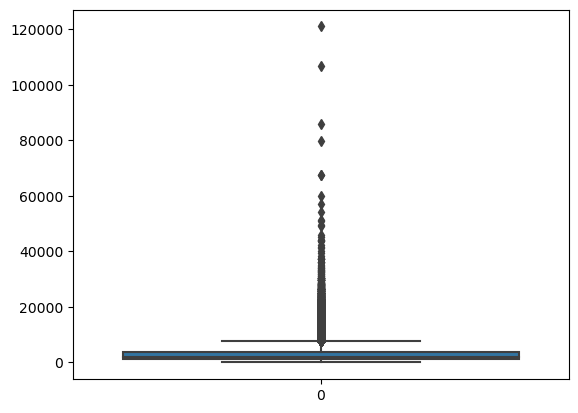

In [8]:
# Presence of Outliers Using IQR Definition of Outliers

# Creation and description
positive_outliers_iqr = loss[
    loss > loss.quantile(0.75) + 1.5 * (loss.quantile(0.75) - loss.quantile(0.25))
]
print(
    f"Using the IQR definition of outlier, there are {len(positive_outliers_iqr)} which collectively have the following features:"
)
display(round(positive_outliers_iqr.describe(), 3))

# Box and whisker plot of loss outliers
loss_box_and_whisker = sns.boxplot(data=loss)
print(
    "\nThe box and whisker plot below visualizes this large number of positive outliers."
)
plt.show()

In [11]:
# Continuous Variable Outliers
for variables in all_state.columns[-15:-1]:
    variable = all_state.loc[:, variables]
    lower_limit = variable[variable < (variable.mean() - (3 * variable.std()))]
    upper_limit = variable[variable > (variable.mean() + (3 * variable.std()))]
    print(
        f"The variable {variables} has {len(lower_limit)} negative outliers and {len(positive_outliers)} positive outliers."
    )

0.49386136456420987 0.18764017641389147
The variable cont1 has 0 negative outliers and 3524 positive outliers.
0.507188356179888 0.20720173860985053
The variable cont2 has 0 negative outliers and 3524 positive outliers.
0.49891845072125063 0.20210460819339118
The variable cont3 has 0 negative outliers and 3524 positive outliers.
0.4918123025893598 0.21129221269281206
The variable cont4 has 0 negative outliers and 3524 positive outliers.
0.48742772878311985 0.2090268285445706
The variable cont5 has 0 negative outliers and 3524 positive outliers.
0.4909445337355038 0.20527256983551662
The variable cont6 has 0 negative outliers and 3524 positive outliers.
0.4849702050680532 0.1784501639606873
The variable cont7 has 0 negative outliers and 3524 positive outliers.
0.4864373158700422 0.1993704545613582
The variable cont8 has 0 negative outliers and 3524 positive outliers.
0.48550631989515086 0.18166017135079005
The variable cont9 has 0 negative outliers and 3524 positive outliers.
0.49806585

In [22]:
for variables in all_state.columns[-15:-1]:
    variable = all_state.loc[:, variables]
    negative_outliers = variable[variable < variable.quantile(0.25) - 1.5 * (variable.quantile(0.75) - variable.quantile(0.25))]
    positive_outliers = variable[variable > variable.quantile(0.75) + 1.5 * (variable.quantile(0.75) - variable.quantile(0.25))]
    print(f"The variable {variables} has {len(lower_limit)} negative outliers and {len(positive_outliers)} positive outliers.")

The variable cont1 has 0 negative outliers and 0 positive outliers.
The variable cont2 has 0 negative outliers and 0 positive outliers.
The variable cont3 has 0 negative outliers and 0 positive outliers.
The variable cont4 has 0 negative outliers and 0 positive outliers.
The variable cont5 has 0 negative outliers and 0 positive outliers.
The variable cont6 has 0 negative outliers and 0 positive outliers.
The variable cont7 has 0 negative outliers and 2659 positive outliers.
The variable cont8 has 0 negative outliers and 0 positive outliers.
The variable cont9 has 0 negative outliers and 12988 positive outliers.
The variable cont10 has 0 negative outliers and 140 positive outliers.
The variable cont11 has 0 negative outliers and 0 positive outliers.
The variable cont12 has 0 negative outliers and 0 positive outliers.
The variable cont13 has 0 negative outliers and 0 positive outliers.
The variable cont14 has 0 negative outliers and 0 positive outliers.


#### 3. Investigate at least three potential predictors of the dependent variable and provide appropriate graphs / statistics to demonstrate the relationships.

After analyzing the heatmap below, I am interested in continuous variables:
      cont14 - it has relatively low correlations with the rest of the continuous variables.
      cont11 - it has relatively high correlations with the rest of the continuous varibales. Additionally, it has a 1.0 correlation with cont12
      cont6 - it has a balanced mix of correlations with other variables.


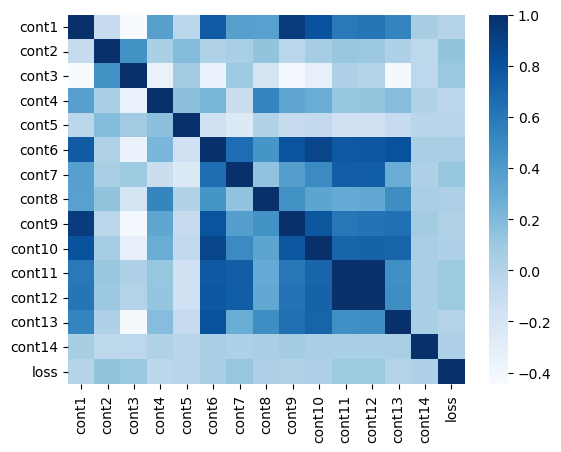

In [23]:
# Correlation Matrix to Investigate Continuous Variables
continuous_variables = all_state.loc[:, all_state.columns[-15:]]
sns.heatmap(continuous_variables.corr(), cmap="Blues")
print(
    """After analyzing the heatmap below, I am interested in continuous variables:
      cont14 - it has relatively low correlations with the rest of the continuous variables.
      cont11 - it has relatively high correlations with the rest of the continuous varibales. Additionally, it has a 1.0 correlation with cont12
      cont6 - it has a balanced mix of correlations with other variables."""
)
plt.show()

Cont14 and Loss have a correlation of 0.0193.
This scatter plot below shows the lack of correlation between the two variables.


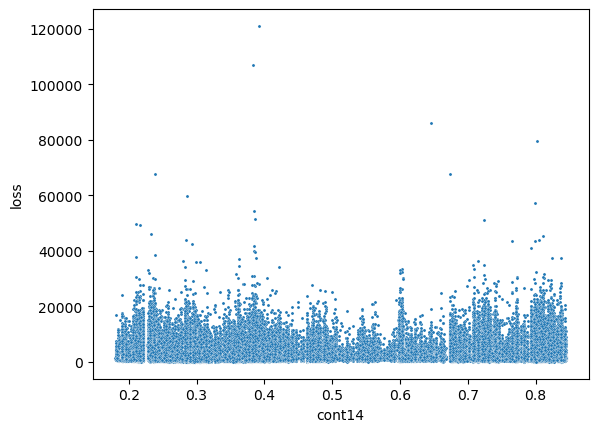

In [24]:
# Cont 14

# Create subset
cont_14 = all_state.loc[:, ["cont14", "loss"]]

# Calculate correlation
cont_14_loss_corr = round((cont_14.corr())["loss"][0], 4)

# Create scatterplot
sns.scatterplot(x=cont_14["cont14"], y=cont_14["loss"], s=5, cmap="Blue")

# Describe data
print(f"Cont14 and Loss have a correlation of {cont_14_loss_corr}.")
print("This scatter plot below shows the lack of correlation between the two variables.")
plt.show()

Cont14 and Loss have a correlation of 0.0998.
The scatter plot below visualizes this correlation. It is interesting to note that the most extreme outliers of loss occur close to where cont11 is close to 1.


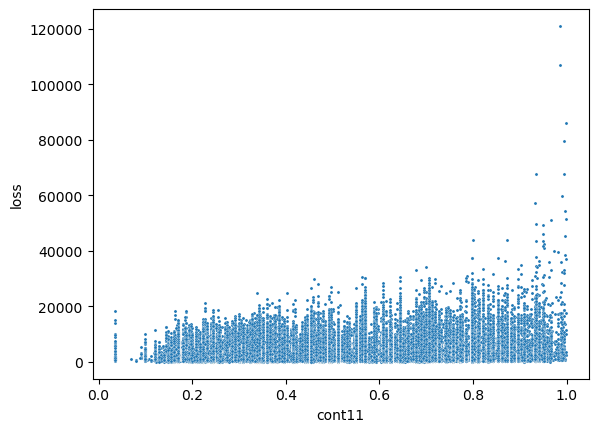

In [25]:
# Cont 11

# Create subset
cont_11 = all_state.loc[:, ["cont11", "loss"]]

# Calculate correlation
cont_11_loss_corr = round((cont_11.corr())["loss"][0], 4)

# Create scatterplot
sns.scatterplot(x=cont_11["cont11"], y=cont_11["loss"], s=5, cmap="Blue")

# Describe data
print(f"Cont14 and Loss have a correlation of {cont_11_loss_corr}.")
print(
    "The scatter plot below visualizes this correlation. It is interesting to note that the most extreme outliers of loss occur close to where cont11 is close to 1."
)
plt.show()

Cont14 and Loss have a correlation of 0.041.
The scatterplot below visualizes this correlation. Outliers of loss are more evenly distributed across values of cont6. There is an interesting gap in values of cont6 between roughly 0.02 and 0.1


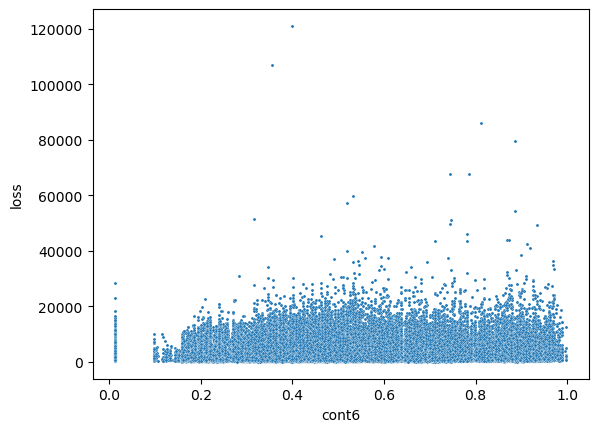

In [26]:
# Cont 6

# Create subset
cont_6 = all_state.loc[:, ["cont6", "loss"]]

# Calculate correlation
cont_6_loss_corr = round((cont_6.corr())["loss"][0], 4)

# Create scatterplot
sns.scatterplot(x=cont_6["cont6"], y=cont_6["loss"], s=5, cmap="Blue")

# Describe data
print(f"Cont14 and Loss have a correlation of {cont_6_loss_corr}.")
print(
    "The scatterplot below visualizes this correlation. Outliers of loss are more evenly distributed across values of cont6. There is an interesting gap in values of cont6 between roughly 0.02 and 0.1"
)
plt.show()

#### 4. Engage in feature creation by splitting, merging, or otherwise generating a new predictor.

The variable that I have created is the mean of all continuous variables.
It has the following features:



count    188318.000000
mean          0.492903
std           0.108030
min           0.177436
25%           0.411647
50%           0.480274
75%           0.564835
max           0.847301
Name: cont_average, dtype: float64

/Users/dylanhayashi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The distplot below shows the distribution of cont_average.
The distribution has a skew of 0.388.
The distribution has a kurtosis of -0.36647504470949643


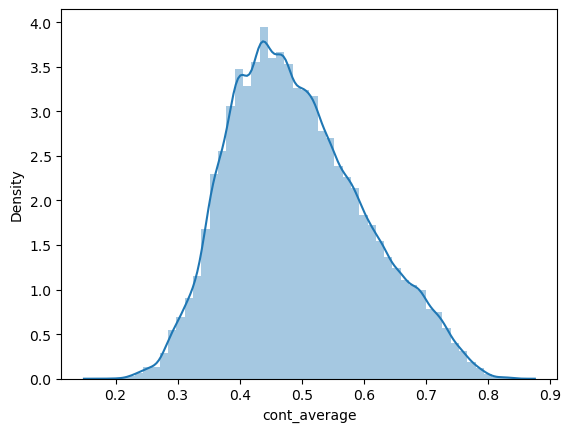

In [28]:
# Create subset of only continuouos variables
cont_values = all_state.loc[:, all_state.columns[-15:-1]]

# Define new variable
continuous_variables["cont_average"] = cont_values.mean(axis=1)

# Describe new variable
print(
    "The variable that I have created is the mean of all continuous variables.\nIt has the following features:\n"
)
display(continuous_variables["cont_average"].describe())

# Display distribution and relevant statistics.
dist_plot = sns.distplot(continuous_variables["cont_average"])
print(
    f"""The distplot below shows the distribution of cont_average.
The distribution has a skew of {round(continuous_variables["cont_average"].skew(),3)}.
The distribution has a kurtosis of {continuous_variables["cont_average"].kurtosis()}"""
)
plt.show(dist_plot)


Cont Average and Loss have a correlation of 0.0841.

The scatterplot below visualizes this correlation.


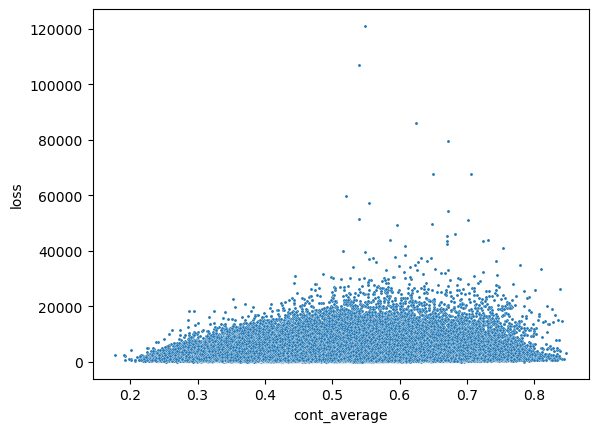

In [29]:
# Create subset containing new variable and loss
cont_average_df = continuous_variables.loc[:, ["cont_average", "loss"]]

# Calculate correlation of new variable and loss
cont_average_loss_corr = round((cont_average_df.corr())["loss"][0], 4)

# Create scatterplot
sns.scatterplot(
    x=cont_average_df["cont_average"], y=cont_average_df["loss"], s=5, cmap="Blue"
)

# Describe data and show scatterplot
print(f"\nCont Average and Loss have a correlation of {cont_average_loss_corr}.")
print("\nThe scatterplot below visualizes this correlation.")
plt.show()

#### 5. Using the dependent variable, perform both min-max and standard scaling in Python.

In [30]:
# Min Max Scaling

# Insantiate standard scaler
scaler = StandardScaler()

# Reshape loss series / array
loss_scaler = np.array(loss).reshape(-1, 1)

# Fit scaler to loss
scaler.fit(loss_scaler)

# Transform loss
loss_scaler = scaler.transform(loss_scaler)

# Add variable to continuous variable dataframe
continuous_variables["standard_scaled_loss"] = loss_scaler

In [31]:
# Min Max Scaling

# Insantiate standard scaler
scaler = MinMaxScaler()

# Reshape loss series / array
loss_scaler = np.array(loss).reshape(-1, 1)

# Fit scaler to loss
scaler.fit(loss_scaler)

# Transform loss
loss_scaler = scaler.transform(loss_scaler)

# Add variable to continuous variable dataframe
continuous_variables["min_max_scaled_loss"] = loss_scaler

In [37]:
# Display dataframe with new variables
display(continuous_variables)

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,cont_average,standard_scaled_loss,min_max_scaled_loss
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,0.558836,-0.283793,0.018283
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,0.503401,-0.603888,0.010602
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,0.351923,-0.011104,0.024828
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,0.426760,-0.722256,0.007761
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,0.309186,-0.094174,0.022834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62,0.397151,-0.633150,0.009899
188314,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34,0.470557,-0.664237,0.009153
188315,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64,0.454589,0.938440,0.047615
188316,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87,0.541392,-0.507723,0.012910


In [44]:
# Descriptive Statistics of Standard Scaled Loss
standard_scaled_loss = continuous_variables['standard_scaled_loss']
display(standard_scaled_loss.describe())
print(f'\nStandard scaled loss has a skew of {standard_scaled_loss.skew()} and a kurtosis of {standard_scaled_loss.kurtosis()}')

count    1.883180e+05
mean     1.463992e-16
std      1.000003e+00
min     -1.045656e+00
25%     -6.311392e-01
50%     -3.174045e-01
75%      2.846711e-01
max      4.062387e+01
Name: standard_scaled_loss, dtype: float64

Standard scaled loss has a skew of 3.7949583775378595 and a kurtosis of 48.0795678254184


In [46]:
# Descriptive Statistics of Max Min Scaled Loss
min_max_scaled_loss = continuous_variables['min_max_scaled_loss']
display(min_max_scaled_loss.describe())
print(f'\nMin max scaled loss has a skew of {standard_scaled_loss.skew()} and a kurtosis of {min_max_scaled_loss.kurtosis()}')

count    188318.000000
mean          0.025094
std           0.023998
min           0.000000
25%           0.009948
50%           0.017477
75%           0.031926
max           1.000000
Name: min_max_scaled_loss, dtype: float64


Min max scaled loss has a skew of 3.7949583775378595 and a kurtosis of 48.07956782541841
